<a href="https://colab.research.google.com/github/sagar9926/MTech_Atificial_Intelligence/blob/main/ML1/Fractal3_Assignment/ML_Problem_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torch import optim
from torch import nn
import matplotlib.pyplot as plt



import torchvision
import torchvision.transforms as transforms

In [4]:
BATCH_SIZE = 64

# torchvision.datasets.MNIST outputs a set of PIL images
# We transform them to tensors
transform = transforms.ToTensor()

# Load and transform data
trainset = torchvision.datasets.MNIST('/tmp', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST('/tmp', train=False, download=True, transform=transform)
valloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /tmp/MNIST/raw/train-images-idx3-ubyte.gz to /tmp/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /tmp/MNIST/raw/train-labels-idx1-ubyte.gz to /tmp/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /tmp/MNIST/raw/t10k-images-idx3-ubyte.gz to /tmp/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /tmp/MNIST/raw/t10k-labels-idx1-ubyte.gz to /tmp/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Exploring The Data

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


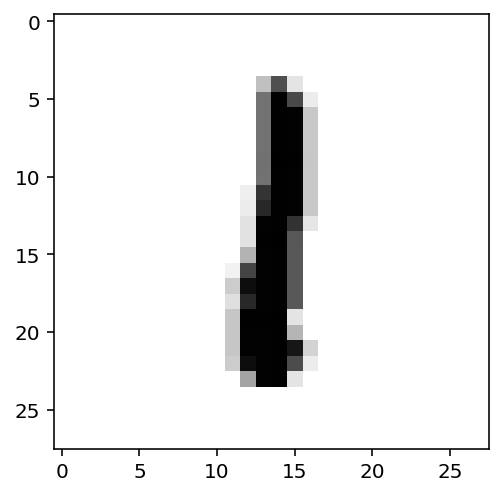

In [6]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

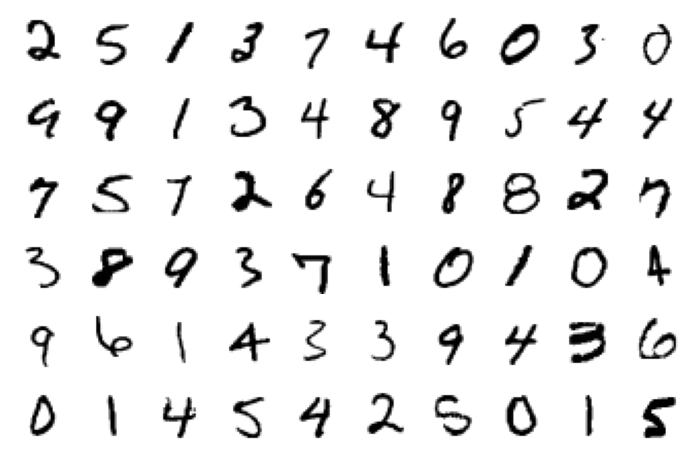

In [7]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [9]:
input_size = 784
output_size = 10
hidden_sizes = [128 , 64]
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [16]:
input_size = 784
output_size = 10

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 0.1291757530892945
Epoch 1 - Training loss: 0.09740347075320756
Epoch 2 - Training loss: 0.08420826308454063
Epoch 3 - Training loss: 0.06865364200309483
Epoch 4 - Training loss: 0.06265348367664694
Epoch 5 - Training loss: 0.051311235076420866
Epoch 6 - Training loss: 0.04900702579849353
Epoch 7 - Training loss: 0.045235536191418874
Epoch 8 - Training loss: 0.047353089499113946
Epoch 9 - Training loss: 0.04943315188175397
Epoch 10 - Training loss: 0.04186463875452016
Epoch 11 - Training loss: 0.039507114936459635
Epoch 12 - Training loss: 0.04000364467767333
Epoch 13 - Training loss: 0.0448277202408511
Epoch 14 - Training loss: 0.04122104048946776

Training Time (in minutes) = 1.4032882809638978


## Experiments by changing number of hidden layers


In [ ]:
learning_rates = [0.0001 , 0.001 , 0.003, 0.005,0.009 ,0.1,0.3,0.5,0.9,1 ,1]
input_size = 784
hidden_sizes = {"two_layer" : [128, 64] ,"three_layer" :  [128 ,128 ,64] ,"four_layer" : [128,128,128,64],"five_layer" :  [128,128,128,128,64],
                "six_layer" :  [128,128,128,128,128,64] , "seven_layer" :  [128,128,128,128,128,128,64],"eight_layer" :  [128,128,128,128,128,128,128,64],
                "nine_layer" :  [128,128,128,128,128,128,128,128,64],"ten_layer" :  [128,128,128,128,128,128,128,128,128,64]}
output_size = 10
loss_plot = {}
acc_plot = {}
for key,layers in hidden_sizes.items() :
  
  loss_plot_single = []

  # Build a feed-forward network
  model = []
  model.append(nn.Linear(input_size, layers[0]))
  model.append(nn.ReLU())
  for k in range(len(layers)- 1):
      model.append(nn.Linear(layers[k], layers[k+1]))
      model.append(nn.ReLU())
  model.append(nn.Linear(layers[-1], output_size))
  model.append(nn.LogSoftmax(dim=1))
  model = nn.Sequential(*model)
  print("##########################################")
  print(f" Number of hidden layers in model : {len(layers)}")
  print(" #################  Model Architecture ###############")
  print(model)
  print("##########################################")

  criterion = nn.NLLLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
  time0 = time()
  epochs = 15
  for e in range(epochs):
      running_loss = 0
      for images, labels in trainloader:
          # Flatten MNIST images into a 784 long vector
          images = images.view(images.shape[0], -1)
      
          # Training pass
          optimizer.zero_grad()
          
          output = model(images)
          loss = criterion(output, labels)
          
          #This is where the model learns by backpropagating
          loss.backward()
          
          #And optimizes its weights here
          optimizer.step()
          
          running_loss += loss.item()
      else:
          loss_plot_single.append(running_loss/len(trainloader))
          print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
      loss_plot[key] = loss_plot_single
  print("\nTraining Time (in minutes) =",(time()-time0)/60)
  correct_count, all_count = 0, 0
  acc_plot_single = []
  for images,labels in valloader:
    for i in range(len(labels)):
      img = images[i].view(1, 784)
      # Turn off gradients to speed up this part
      with torch.no_grad():
          logps = model(img)

      # Output of the network are log-probabilities, need to take exponential for probabilities
      ps = torch.exp(logps)
      probab = list(ps.numpy()[0])
      pred_label = probab.index(max(probab))
      true_label = labels.numpy()[i]
      if(true_label == pred_label):
        correct_count += 1
      all_count += 1

  print("Number Of Images Tested =", all_count)
  acc_plot[key] = (correct_count/all_count)*100
  print("\nModel Accuracy =", (correct_count/all_count))

##########################################
 Number of hidden layers in model : 2
 #################  Model Architecture ###############
Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
##########################################
Epoch 0 - Training loss: 0.28954469353687373
Epoch 1 - Training loss: 0.12962468480443093
Epoch 2 - Training loss: 0.09385823742980495
Epoch 3 - Training loss: 0.07932427402899496
Epoch 4 - Training loss: 0.06918921742152903
Epoch 5 - Training loss: 0.06340273659696047
Epoch 6 - Training loss: 0.05736393392735622
Epoch 7 - Training loss: 0.05023032434879547
Epoch 8 - Training loss: 0.04546180204061708
Epoch 9 - Training loss: 0.048641635594100924
Epoch 10 - Training loss: 0.04476408918096312
Epoch 11 - Training loss: 0.03752597275096957
Epoch 12 - Training loss: 0.041888

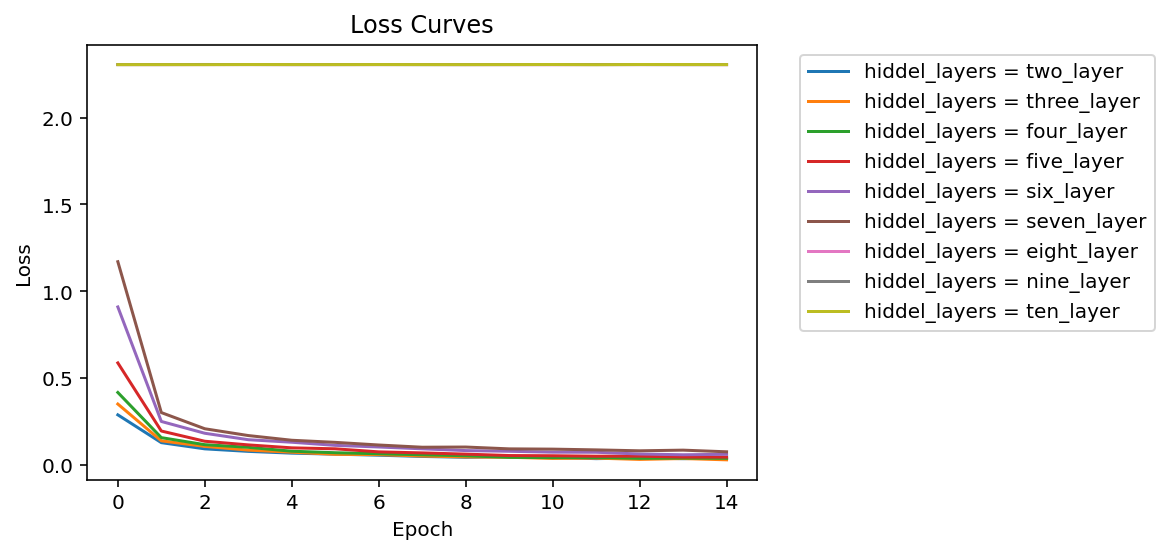

In [ ]:
fig, ax = plt.subplots()

for  hl , loss in loss_plot.items():
  label = "hiddel_layers = " + hl
  ax.plot(loss,label=label)

  plt.title("Loss Curves")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  leg = ax.legend();
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


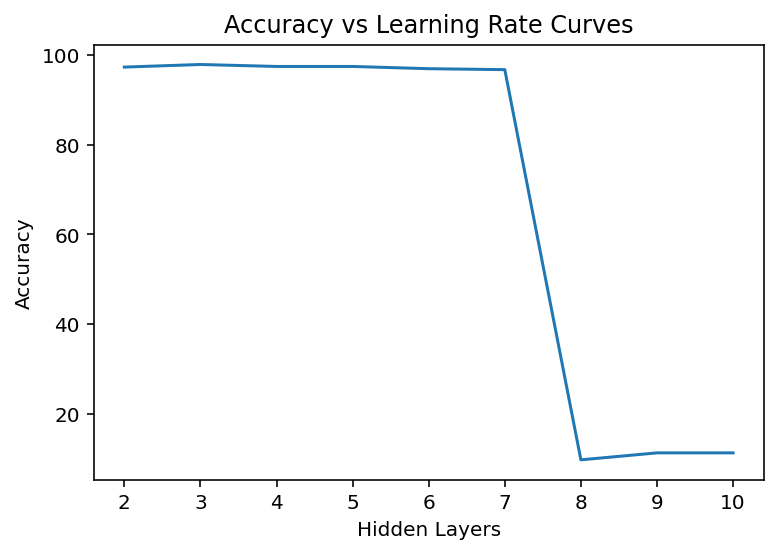

In [ ]:
fig, ax = plt.subplots()

ax.plot( [2 ,3 ,4,5,6,7,8,9,10] , list(acc_plot.values()))

plt.title("Accuracy vs Learning Rate Curves")
plt.xlabel("Hidden Layers")
plt.ylabel("Accuracy")
plt.show()


## Perform Grid Search to get best Learning rate

In [ ]:
learning_rates = [0.0001 , 0.001 , 0.003, 0.005,0.009 ,0.1,0.3,0.5,0.9,1 ,1]
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
loss_plot = {}
acc_plot = {}
for lr in learning_rates :
  
  loss_plot_single = []

  # Build a feed-forward network
  model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[1], output_size),
                        nn.LogSoftmax(dim=1))
  criterion = nn.NLLLoss()
  optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
  time0 = time()
  epochs = 15
  print("############################################")
  print(f" Training Model with Learning Rate = {lr} " )
  print("############################################")
  for e in range(epochs):
      running_loss = 0
      for images, labels in trainloader:
          # Flatten MNIST images into a 784 long vector
          images = images.view(images.shape[0], -1)
      
          # Training pass
          optimizer.zero_grad()
          
          output = model(images)
          loss = criterion(output, labels)
          
          #This is where the model learns by backpropagating
          loss.backward()
          
          #And optimizes its weights here
          optimizer.step()
          
          running_loss += loss.item()
      else:
          loss_plot_single.append(running_loss/len(trainloader))
          print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
      loss_plot[lr] = loss_plot_single
  print("\nTraining Time (in minutes) =",(time()-time0)/60)
  correct_count, all_count = 0, 0
  acc_plot_single = []
  for images,labels in valloader:
    for i in range(len(labels)):
      img = images[i].view(1, 784)
      # Turn off gradients to speed up this part
      with torch.no_grad():
          logps = model(img)

      # Output of the network are log-probabilities, need to take exponential for probabilities
      ps = torch.exp(logps)
      probab = list(ps.numpy()[0])
      pred_label = probab.index(max(probab))
      true_label = labels.numpy()[i]
      if(true_label == pred_label):
        correct_count += 1
      all_count += 1

  print("Number Of Images Tested =", all_count)
  acc_plot[lr] = (correct_count/all_count)*100
  print("\nModel Accuracy =", (correct_count/all_count))

############################################
 Training Model with Learning Rate = 0.0001 
############################################
Epoch 0 - Training loss: 2.2963412372288166
Epoch 1 - Training loss: 2.2741458764208407
Epoch 2 - Training loss: 2.2393512159014053
Epoch 3 - Training loss: 2.183252504131179
Epoch 4 - Training loss: 2.0932161919852055
Epoch 5 - Training loss: 1.9515763312768835
Epoch 6 - Training loss: 1.7435023447852145
Epoch 7 - Training loss: 1.481601371566878
Epoch 8 - Training loss: 1.2181567151282133
Epoch 9 - Training loss: 1.0042714866112545
Epoch 10 - Training loss: 0.851430354278479
Epoch 11 - Training loss: 0.7463697860362941
Epoch 12 - Training loss: 0.6728524736631145
Epoch 13 - Training loss: 0.6192066896317611
Epoch 14 - Training loss: 0.5782371905566787

Training Time (in minutes) = 1.971336023012797
Number Of Images Tested = 10000

Model Accuracy = 0.8566
############################################
 Training Model with Learning Rate = 0.001 
#########

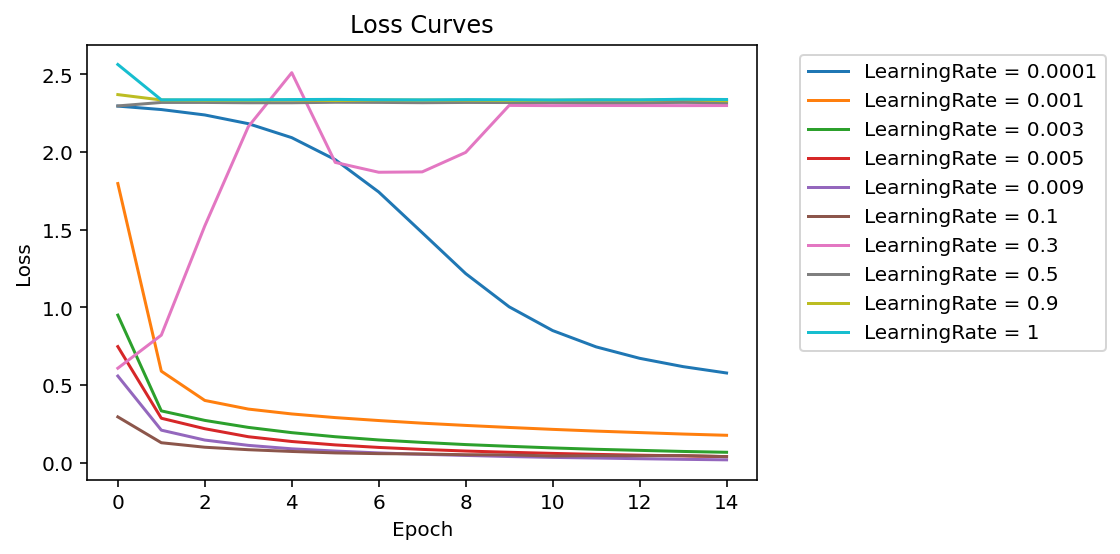

In [ ]:
fig, ax = plt.subplots()

for lr , loss in loss_plot.items():
  label = "LearningRate = " + str(lr)
  ax.plot(loss,label=label)

  plt.title("Loss Curves")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  leg = ax.legend();
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


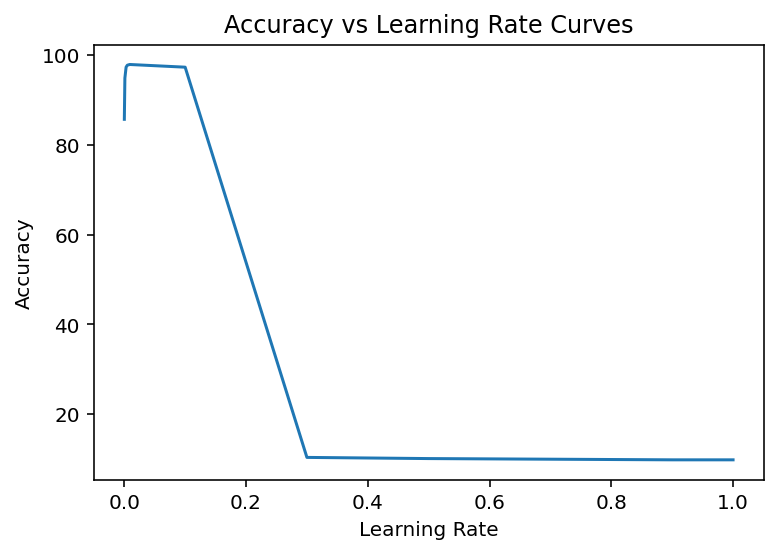

In [ ]:
fig, ax = plt.subplots()

ax.plot( list(acc_plot.keys()) , list(acc_plot.values()))

plt.title("Accuracy vs Learning Rate Curves")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.show()
